In [1]:
#phase 1

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('customer_analytics.csv')
print(data.head())

print("Data Types:", data.info())

print("Statistics Information of data", data.describe())

print("Rows:", data.shape[0])
print("Columns:", data.shape[1])


   CustomerID  Age  Gender    City  Education MaritalStatus  AnnualIncome  \
0        1001   49    Male    Pune    Masters        Single           NaN   
1        1002   31    Male    Pune        PhD        Single       52295.0   
2        1003   44    Male  Mumbai  Bachelors        Single       70444.0   
3        1004   23  Female  Mumbai    Masters       Married       46980.0   
4        1005   34    Male    Pune    Masters       Married       67195.0   

   SpendingScore  YearsEmployed  PurchaseFrequency  OnlineVisitsPerMonth  \
0             66             23                  7                    28   
1             43              4                  3                    24   
2             39             21                 10                    18   
3             56              1                  7                    20   
4             46             13                  2                    22   

   ReturnedItems PreferredDevice  LastPurchaseAmount  
0              2         

This dataset contains information about customers, including their demographic details, income, purchase behavior, and online activity.

Each row represents one unique customer.

The dataset includes the following important features:

- CustomerID: Unique identifier for each customer
- Age: Age of the customer
- Gender: Male or Female
- City: Customer's city
- Education: Education level
- MaritalStatus: Married or Single
- AnnualIncome: Customer’s yearly income
- SpendingScore: Score assigned based on spending behavior
- YearsEmployed: Years of employment
- PurchaseFrequency: Number of purchases made
- OnlineVisitsPerMonth: Website visits per month
- ReturnedItems: Number of returned items
- PreferredDevice: Device used for shopping
- LastPurchaseAmount: Amount spent in last purchase


In [2]:
#phase 2
print("Checking for null values:", data.isnull().sum())

data['Education'].fillna(data['Education'].mode()[0], inplace=True)
data['AnnualIncome'].fillna(data['AnnualIncome'].median(), inplace=True)

print("\nAfter Cleaning the data:", data.isnull().sum())

Checking for null values: CustomerID               0
Age                      0
Gender                   0
City                     0
Education               12
MaritalStatus            0
AnnualIncome            12
SpendingScore            0
YearsEmployed            0
PurchaseFrequency        0
OnlineVisitsPerMonth     0
ReturnedItems            0
PreferredDevice          0
LastPurchaseAmount       0
dtype: int64

After Cleaning the data: CustomerID              0
Age                     0
Gender                  0
City                    0
Education               0
MaritalStatus           0
AnnualIncome            0
SpendingScore           0
YearsEmployed           0
PurchaseFrequency       0
OnlineVisitsPerMonth    0
ReturnedItems           0
PreferredDevice         0
LastPurchaseAmount      0
dtype: int64


C:\Users\keert\AppData\Local\Temp\ipykernel_10992\2751096149.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Education'].fillna(data['Education'].mode()[0], inplace=True)
C:\Users\keert\AppData\Local\Temp\ipykernel_10992\2751096149.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [3]:
data.duplicated().sum()

np.int64(5)

In [4]:
data.drop_duplicates(inplace=True)

Cleaning Summary

- Missing values in Education filled using mode
- Missing values in AnnualIncome filled using median
- Duplicate rows removed

Dataset is now clean and ready for analysis.

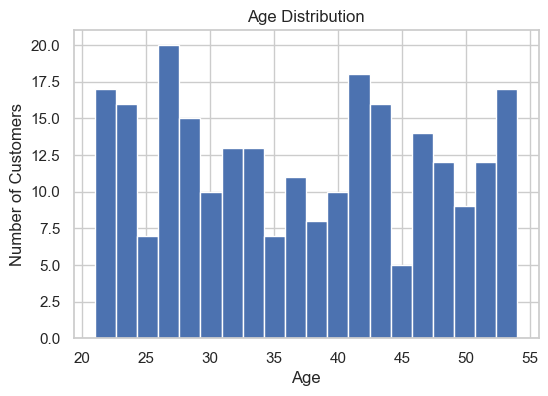

In [5]:
#phase 3

sns.set(style= 'whitegrid')
plt.figure(figsize=(6,4))
plt.hist(data['Age'], bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

Observation:
Most customers are between age 25 and 45. This suggests the platform is popular among young and middle-aged adults.

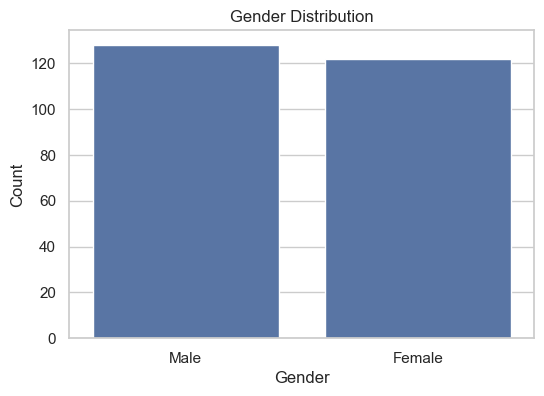

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=data)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

Observation:
Male and Female customers are nearly equally distributed, indicating balanced gender representation.

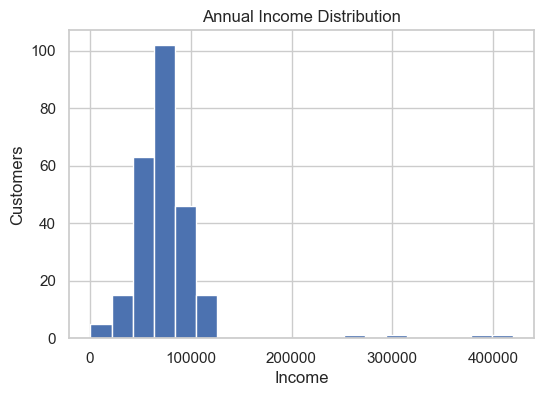

In [7]:
plt.figure(figsize=(6,4))
plt.hist(data['AnnualIncome'], bins=20)
plt.title("Annual Income Distribution")
plt.xlabel("Income")
plt.ylabel("Customers")
plt.show()

Observation:
Most customers fall into middle income range, with few high-income outliers.

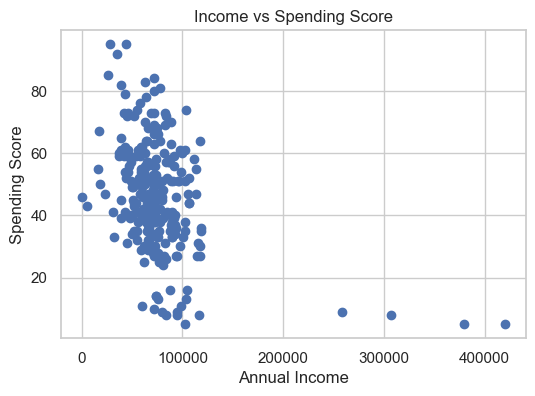

In [8]:
plt.figure(figsize=(6,4))
plt.scatter(data['AnnualIncome'], data['SpendingScore'])
plt.title("Income vs Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

Observation:
Customers with higher income do not always spend more. Spending behavior varies significantly.

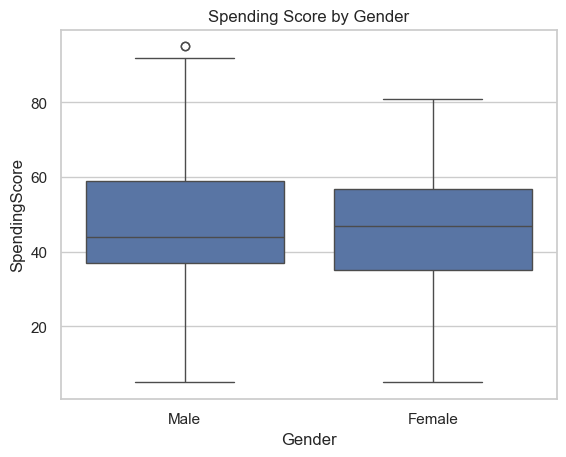

In [9]:
sns.boxplot(x='Gender', y='SpendingScore', data=data)
plt.title("Spending Score by Gender")
plt.show()

Observation:
Both genders show similar spending patterns with slight variation.

In [10]:
corr = data.corr(numeric_only=True)
corr

,CustomerID,Age,AnnualIncome,SpendingScore,YearsEmployed,PurchaseFrequency,OnlineVisitsPerMonth,ReturnedItems,LastPurchaseAmount
CustomerID,1.000000,-0.037993,-0.069512,0.067295,-0.021800,-0.015557,-0.055366,-0.003233,0.040980
Age,-0.037993,1.000000,-0.002708,-0.040991,0.975846,0.007623,0.049105,-0.019152,0.073269
AnnualIncome,-0.069512,-0.002708,1.000000,-0.399138,-0.009036,0.057291,0.125349,0.021270,0.069594
SpendingScore,0.067295,-0.040991,-0.399138,1.000000,-0.065297,-0.030121,-0.029154,0.059443,0.000618
YearsEmployed,-0.021800,0.975846,-0.009036,-0.065297,1.000000,0.015569,0.021750,-0.009740,0.084007
PurchaseFrequency,-0.015557,0.007623,0.057291,-0.030121,0.015569,1.000000,0.064154,-0.006154,0.041325
OnlineVisitsPerMonth,-0.055366,0.049105,0.125349,-0.029154,0.021750,0.064154,1.000000,0.067862,-0.048400
ReturnedItems,-0.003233,-0.019152,0.021270,0.059443,-0.009740,-0.006154,0.067862,1.000000,-0.009807
LastPurchaseAmount,0.040980,0.073269,0.069594,0.000618,0.084007,0.041325,-0.048400,-0.009807,1.000000


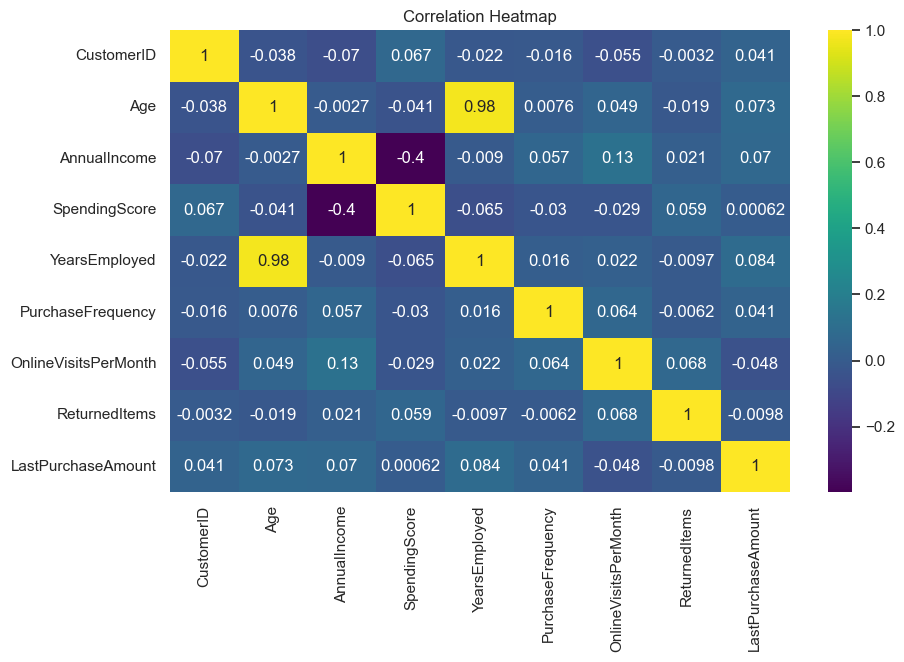

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()

Observation:
Strong correlations help identify relationships such as income, spending, and purchase frequency.

Executive Summary

Top 3 Insights:

1. Most customers are aged between 25–45, indicating young and middle-aged users dominate.
2. Annual income does not strongly determine spending score — behavior varies by individual.
3. Purchase activity is influenced more by engagement (online visits, frequency) rather than income alone.

Conclusion:
Customer engagement metrics are more useful predictors of spending than demographic features alone.

Improvement Ideas

1. Provide special offers to high-spending customers to increase retention.
2. Target low-spending customers with personalized promotions.
3. Improve online experience to increase engagement and purchases.
4. Segment customers for more effective marketing strategies.
5. Reduce product returns by improving product quality and support.